In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv('/Users/csuen/Desktop/Sun-NG-24/radicals/UKESM1-0-LL_2010_2014(ver231212).csv')

In [3]:
list(dataset)

['longitude',
 'latitude',
 't',
 'loc',
 'o3',
 'o3prod',
 'o3loss',
 'eminox',
 'emivoc',
 'tas',
 'hus',
 'aod',
 'bldep',
 'ua',
 'va',
 'ps',
 'jno2',
 'photo1d',
 'lossch4',
 'lossco',
 'no2',
 'no',
 'oh',
 'h2o',
 'pan',
 'hno3',
 'co',
 'hcho',
 'ch4',
 'ch3o2_mod',
 'ho2_mod',
 'o1d_mod',
 'o3_mole',
 'no2_mole',
 'no_mole',
 'h2o_mole',
 'co_mole',
 'hcho_mole',
 'oh_mole',
 'n2_mole',
 'o2_mole',
 'lossco_mole',
 'lossch4_mole',
 'o1d_mole',
 'ho2_mole',
 'ch3o2_mole',
 'ch3ooh_mole',
 'o1d_mod_vmr',
 'ho2_mod_vmr',
 'ch3o2_mod_vmr',
 'o1d_vmr',
 'ho2_vmr',
 'ch3o2_vmr',
 'o1d_mod_mole',
 'ho2_mod_mole',
 'ch3o2_mod_mole',
 'o1d_mole_adj',
 'ho2_mole_adj',
 'ch3o2_mole_adj',
 'k1',
 'k2',
 'k3',
 'k4',
 'k5',
 'k6',
 'k7',
 'k8',
 'k9',
 'k9a',
 'k9b',
 'k10',
 'k11',
 'k12',
 'k13',
 'k14',
 'k15',
 'k15a',
 'k15b',
 'k16',
 'pt1',
 'pt2',
 'pt4',
 'pt5',
 'pt6',
 'o3prod_mole',
 'o3loss_mole',
 'pt3',
 'pt7',
 'pt3_adj',
 'pt7_adj',
 'o3prod_mole_adj',
 'o3loss_mole_adj',

In [4]:
land = pd.read_csv('/Users/csuen/Documents/GitHub/ozone-budget/global_grid_2x2_label_continent.csv')
dataset_land = dataset.merge(land, how='left', left_on=['longitude','latitude'], right_on=['longitude','latitude'])
dataset_land = dataset_land[dataset_land['land_global']==1]

In [17]:
model = RandomForestRegressor()
y = dataset_land['o1d_mod_mole']
X = dataset_land[['o1d_mole']]
model.fit(X,y)
y_pred = model.predict(X)
r2_score(y, y_pred)

0.9861025172337003

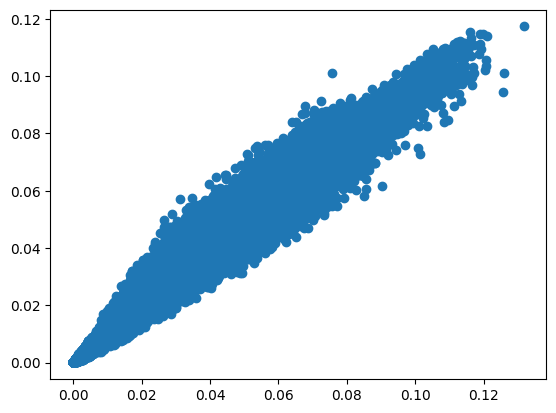

In [18]:
plt.scatter(y, y_pred)

In [19]:
dataset_land['o1d_approx'] = y_pred

In [8]:
model = RandomForestRegressor()
y = dataset_land['ho2_mod_mole']
X = dataset_land[['ho2_mole','co_mole','lossco_mole']]
model.fit(X,y)
y_pred = model.predict(X)
r2_score(y, y_pred)

0.9643858982770874

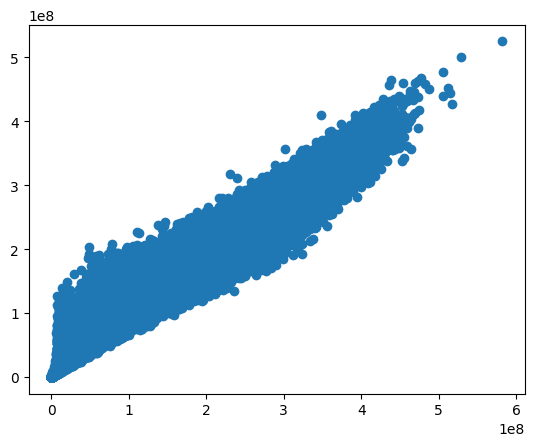

In [9]:
plt.scatter(y, y_pred)

In [10]:
dataset_land['ho2_approx'] = y_pred

In [11]:
model = RandomForestRegressor()
y = dataset_land['ch3o2_mod_mole']
X = dataset_land[['ch3o2_mole','ch4_mole']]
model.fit(X,y)
y_pred = model.predict(X)
r2_score(y, y_pred)

0.9775165593189697

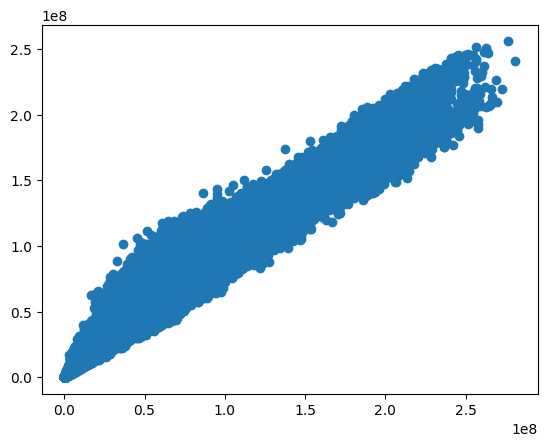

In [12]:
plt.scatter(y, y_pred)

In [13]:
dataset_land['ch3o2_approx'] = y_pred

In [20]:
dataset_neat = dataset_land[['longitude','latitude','t',
                             'o1d_mod_mole','ho2_mod_mole','ch3o2_mod_mole',
                             'o1d_approx','ho2_approx','ch3o2_approx']]

dataset_neat.to_csv('/Users/csuen/Documents/GitHub/ozone-radical/Extended Data Fig. 2/Extended Data Fig. 2 radical evaluation.csv', index=False)